In [1]:
pip install pandas scikit-learn matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd

# Load the dataset
df = pd.read_csv('student-mat.csv', sep=';')
print(df.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [12]:
X = df[['absences', 'G1', 'G2', 'studytime', 'failures']]
y = df['G3']

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
from sklearn.linear_model import LinearRegression

# Train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [16]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict
y_pred = model.predict(X_test_scaled)

# Evaluate
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MSE: 4.4665032120156045
R2 Score: 0.7821754247320556


In [17]:
new_data = pd.DataFrame({
    'absences': [4],
    'G1': [12],
    'G2': [13],
    'studytime': [2],
    'failures': [0]
})

new_data_scaled = scaler.transform(new_data)
predicted_grade = model.predict(new_data_scaled)

print("Predicted Final Grade (G3):", predicted_grade[0])

Predicted Final Grade (G3): 12.86176556002495


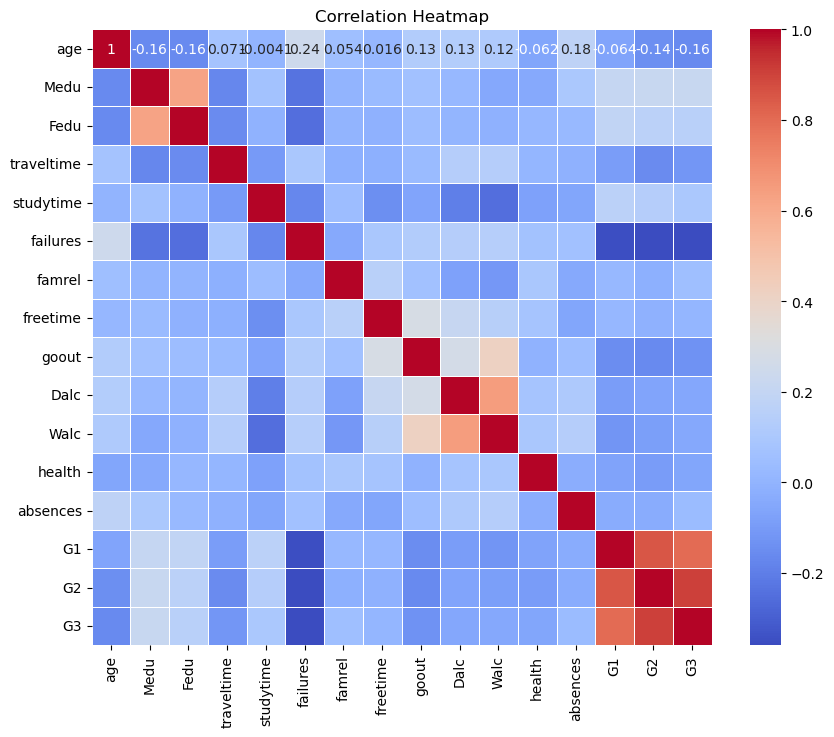

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Correlation matrix plot
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

C:\Users\risha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


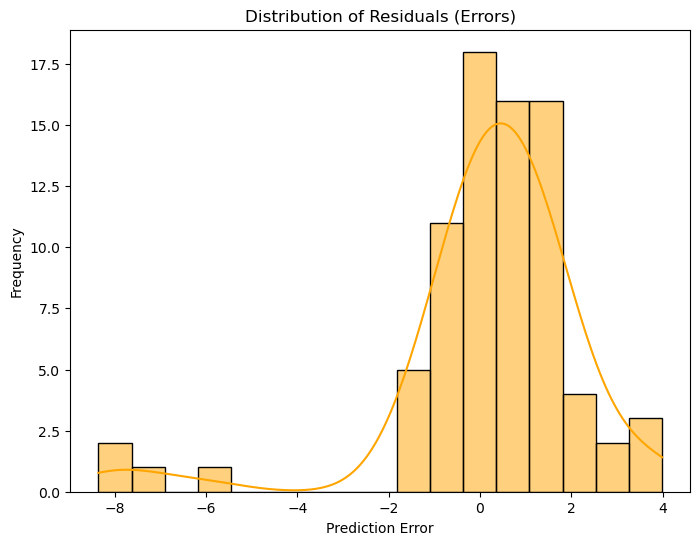

In [21]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='orange')
plt.title("Distribution of Residuals (Errors)")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.show()

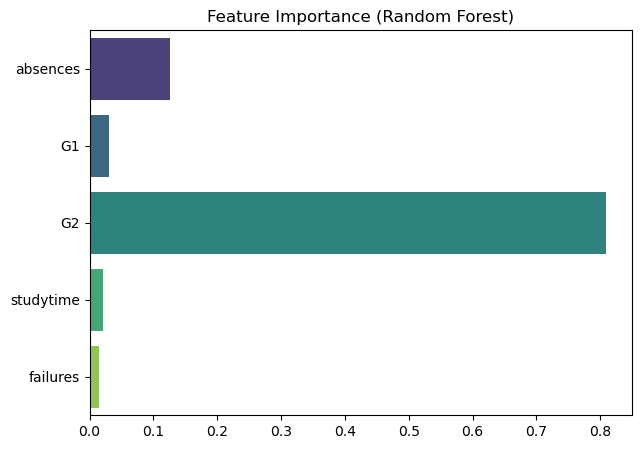

In [22]:
from sklearn.ensemble import RandomForestRegressor

# Fit the model
rf = RandomForestRegressor()
rf.fit(X_train_scaled, y_train)

# Plot feature importance
importances = rf.feature_importances_
features = X.columns

plt.figure(figsize=(7, 5))
sns.barplot(x=importances, y=features, palette='viridis')
plt.title("Feature Importance (Random Forest)")
plt.show()